# Import Libraries & Data for Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import seaborn as sns
from my_func import *
import pylab

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [2]:
df = pd.read_csv('linreg_ready_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   waterfront         21597 non-null  float64
 1   log10_price        21597 non-null  float64
 2   log10_sqft_living  21597 non-null  float64
 3   zipcode_98002      21597 non-null  int64  
 4   zipcode_98003      21597 non-null  int64  
 5   zipcode_98004      21597 non-null  int64  
 6   zipcode_98005      21597 non-null  int64  
 7   zipcode_98006      21597 non-null  int64  
 8   zipcode_98007      21597 non-null  int64  
 9   zipcode_98008      21597 non-null  int64  
 10  zipcode_98010      21597 non-null  int64  
 11  zipcode_98011      21597 non-null  int64  
 12  zipcode_98014      21597 non-null  int64  
 13  zipcode_98019      21597 non-null  int64  
 14  zipcode_98022      21597 non-null  int64  
 15  zipcode_98023      21597 non-null  int64  
 16  zipcode_98024      215

# Build The Model

In [3]:
# define our input variable (X) & output variable
X = df.drop(columns='log10_price')
Y = df[['log10_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# the VIFdoes expect a constant term in the data, so we need to add one using the add_constant method
x_1 = sm.tools.add_constant(df.drop(columns='log10_price'))
#X2 = sm.tools.add_constant(df_iter_1)

# create the series for both
vif_check_df = pd.Series([variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])], index=x_1.columns)

# display the series
display(vif_check_df.loc[vif_check_df > 5])


const    448.387606
dtype: float64

#### Make Predictions like this

In [13]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[5.33644819],
       [5.54907074],
       [5.52335965],
       [5.50779895],
       [5.81708809]])

# Evaluate the Model

In [14]:
# define our intput
X3 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X)

# fit the data
est = model.fit()

# check the data
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:            log10_price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.266e+05
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:00:06   Log-Likelihood:                          7281.1
No. Observations:               21597   AIC:                                 -1.442e+04
Df Residuals:                   21526   BIC:                                 -1.385e+04
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [16]:
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE = {:.3} ".format(model_mse))
print("MSE = {} ".format(10**model_mse))

print("MAE = {:.3}".format(model_mae))


print("RMSE = {:.3}".format(model_rmse))

MSE = 0.009 
MSE = 1.0209428622318355 
MAE = 0.0701
RMSE = 0.0949


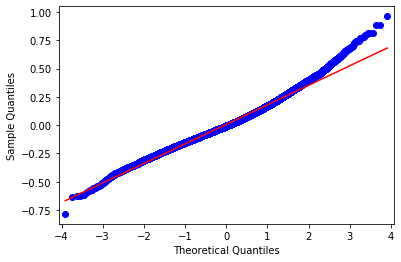

The mean of the residuals is 0.006838


In [8]:
# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [9]:
est.pvalues.loc[est.pvalues>.05]
#first run pvalues > .05 = bedrooms_9,11,33 & zipcode_98023
#return to data cleaning notebook and remove these columns

Series([], dtype: float64)

# Save for Later Use

In [10]:
import pickle

# pickle the model.
with open('kc_county_multilinreg.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in to see if everything works
with open('kc_county_multilinreg.sav', 'rb') as pickle_file:
     regression_model_predictor = pickle.load(pickle_file)